# Project Temperature/Time Series

## Time Series Data

"An obvious characteristic of time series data that distinguishes it from cross-sectional data is temporal ordering." - Introductory Econometrics, J. Wooldridge

Time Series data has (or can have) the following components:
1. Trend
- Seasonality
- Remainder:
    - Randomness
    - Time Dependence

## Time Series Analysis

Time Series Analysis is a field of statistical Analysis that deals with modelling **time dependence**. The other properties of time series will have to be taken into account in order to model it, but the time dependence is what we try to understand in time series analysis. Thereby, we can extract meaningful information from the past.

Ask yourself the question:
Is there meaningful information in the past observations of the time series that cannot be captured by any covarying variable?
If the answer is **yes**, that is when time series analysis comes into play. This could be the case if we either can't model any other relationship or we cannot access the necessary data.

## Topics we will cover this week

**Time Series:**

- Decompose time series data into its different components
- Use a naive forecast as a baseline model
- Learn how to use Autoregressive (AR) and Autoregressive-Integrated-Moving-Average (ARIMA) Models to predict the future.
- Evaluate your forecasts

**Miscellaneous:**

- Distribution Functions
- Python Namespaces
- Useful Python Modules
- Plotting on Maps

## Main Project Goal

- Understand the purpose of and the idea behind time series analysis
- Be able to make short term temperature forecasts

## Possible project results at the end of the week

- Data Wrangling: Create a large dataset of climate data from individual files
- Interactive Visualizations: geojson, geopandas, folium/ plotly library
- Forecasting: Create a model that is able to make short term temperature forecasts (using statsmodels, sklearn, sktime or fbprophet) and evaluate their performance

# Time Series Decomposition

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set figure size to (12, 6)
plt.rcParams['figure.figsize'] = (12,6)

## Step 1 - Load the Data

In [3]:
# Load the flights dataset from seaborn
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## Step 2 - Plot the time series

In [9]:
# Combine the month and year column and make a new column out of it
df['Date'] = pd.to_datetime(df['year'].astype(str) + ' ' + df['month'].astype(str))
df.head()

,year,month,passengers,Date
0,1949,January,112,1949-01-01
1,1949,February,118,1949-02-01
2,1949,March,132,1949-03-01
3,1949,April,129,1949-04-01
4,1949,May,121,1949-05-01


In [11]:
# Set the new columns as the index
df.set_index('Date', inplace=True)

In [12]:
df.head()

,year,month,passengers
Date,,,
1949-01-01,1949,January,112
1949-02-01,1949,February,118
1949-03-01,1949,March,132
1949-04-01,1949,April,129
1949-05-01,1949,May,121


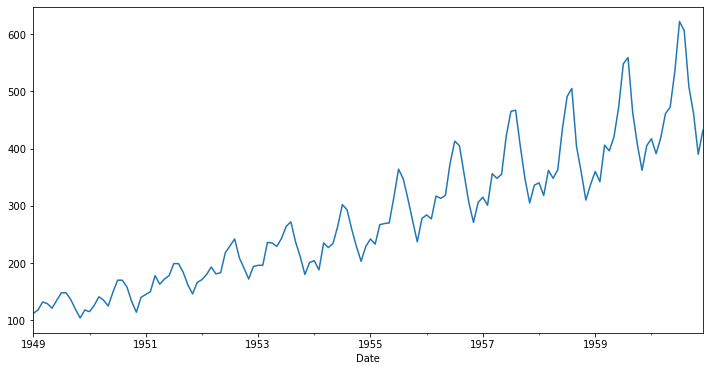

In [13]:
# Plot the series
df['passengers'].plot()

## Step 3 - Remove the trend

- Differencing - if the trend is linear
- Second order differencing - if the trend is quadratic

### 3.1) Differencing

In [17]:
df['passengers'].diff()

Date
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: passengers, Length: 144, dtype: float64

In [18]:
# Create a column with the differences of passengers
df['difference'] = df['passengers'].diff()
df.head()

,year,month,passengers,difference
Date,,,,
1949-01-01,1949,January,112,NaN
1949-02-01,1949,February,118,6.0
1949-03-01,1949,March,132,14.0
1949-04-01,1949,April,129,-3.0
1949-05-01,1949,May,121,-8.0


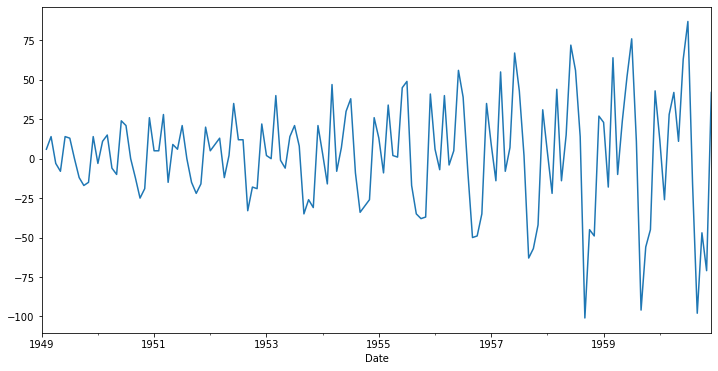

In [19]:
# Plot the result
df['difference'].plot()

In [20]:
# Look at the mean
df['difference'].mean()

2.237762237762238

### 1.2) Second order differencing

Second order differencing is used if the time series has an quadratic trend rather than a linear trend.

In [21]:
# Create a column with the differences of passengers
df['second_order_difference'] = df['difference'].diff()
df.head()

,year,month,passengers,difference,second_order_difference
Date,,,,,
1949-01-01,1949,January,112,NaN,NaN
1949-02-01,1949,February,118,6.0,NaN
1949-03-01,1949,March,132,14.0,8.0
1949-04-01,1949,April,129,-3.0,-17.0
1949-05-01,1949,May,121,-8.0,-5.0


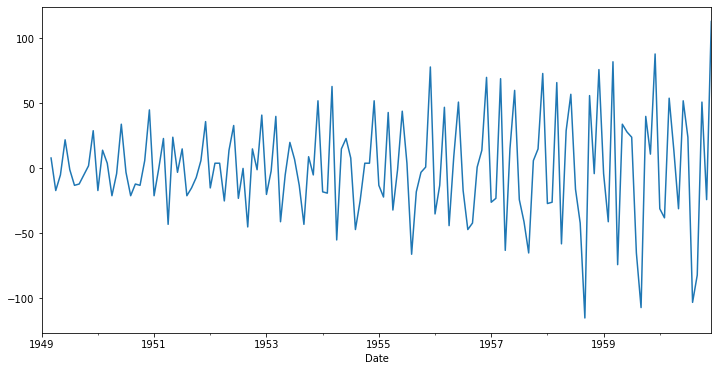

In [22]:
# Plot the result
df['second_order_difference'].plot()

### How could we check for a trend and assess what kind of trend our data follows?

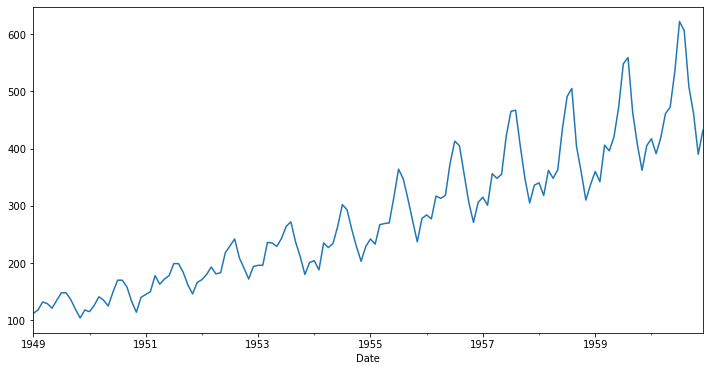

In [23]:
df['passengers'].plot()

This could be a linear trend or maybe a slightly exponential trend.


A way we can deal with that is to fit a linear regression on a timestamp (and/or a squared timestamp) to figure out whether there is evidence for a trend and which kind of trend might describe the trend best.

hint: this week we will generally use statsmodels rather than sklearn

In [24]:
from statsmodels.api import OLS, add_constant

In [35]:
# Create a timestep variable
df['timestep'] = np.arange(1, len(df)+1)

# Create a squared timestep variable as well
df['timestep^2'] = df['timestep']**2
df.head()

,year,month,passengers,difference,second_order_difference,timestep,timestep^2
Date,,,,,,,
1949-01-01,1949,January,112,NaN,NaN,1,1
1949-02-01,1949,February,118,6.0,NaN,2,4
1949-03-01,1949,March,132,14.0,8.0,3,9
1949-04-01,1949,April,129,-3.0,-17.0,4,16
1949-05-01,1949,May,121,-8.0,-5.0,5,25


In [40]:
# fit the model
X = add_constant(df['timestep'])
X_sq = add_constant(df[['timestep', 'timestep^2']])
X.head()

,const,timestep
Date,,
1949-01-01,1.0,1
1949-02-01,1.0,2
1949-03-01,1.0,3
1949-04-01,1.0,4
1949-05-01,1.0,5


In [41]:
y = df['passengers']

In [43]:
# Create a model with the timestep only
m = OLS(y, X) # OLS stands for ordinary least squares and it is a method
# to solve a linear regression
results = m.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             passengers   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     828.2
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           4.02e-61
Time:                        11:00:28   Log-Likelihood:                -754.82
No. Observations:                 144   AIC:                             1514.
Df Residuals:                     142   BIC:                             1520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.6528      7.716     11.359      0.000      72.399     102.907
timestep       2.6572      0.092     28.778      0.000       2.475       2.840
==============================================================================
Omnibus:                       24.637   Durbin-Watson:                   0.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.905
Skew:                           0.940   Prob(JB):                     4.34e-08
Kurtosis:                       4.454   Cond. No.                         168.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Create a model with the squared timestep
m_sq = OLS(y, X_sq)
results_sq = m_sq.fit()
results_sq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             passengers   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     439.8
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.49e-61
Time:                        11:00:39   Log-Likelihood:                -750.67
No. Observations:                 144   AIC:                             1507.
Df Residuals:                     141   BIC:                             1516.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        112.3800     11.384      9.872      0.000      89.874     134.886
timestep       1.6410      0.362      4.527      0.000       0.924       2.358
timestep^2     0.0070      0.002      2.894      0.004       0.002       0.012
==============================================================================
Omnibus:                       19.218   Durbin-Watson:                   0.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.828
Skew:                           0.810   Prob(JB):                     6.70e-06
Kurtosis:                       4.161   Cond. No.                     2.85e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             passengers   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     439.8
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.49e-61
Time:                        10:58:27   Log-Likelihood:                -750.67
No. Observations:                 144   AIC:                             1507.
Df Residuals:                     141   BIC:                             1516.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        112.3800     11.384      9.872      0.000      89.874     134.886
timestep       1.6410      0.362      4.527      0.000       0.924       2.358
timestep^2     0.0070      0.002      2.894      0.004       0.002       0.012
==============================================================================
Omnibus:                       19.218   Durbin-Watson:                   0.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.828
Skew:                           0.810   Prob(JB):                     6.70e-06
Kurtosis:                       4.161   Cond. No.                     2.85e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Step 4 - Remove trend and changes in volatility

**Only do this if the time series shows changes in volatility, this might not be the case in the project!!!**

In [46]:
# Create a column with the percentage change of passenger numbers
df['percentage_change'] = df['passengers'].pct_change()
df.head()

,year,month,passengers,difference,second_order_difference,timestep,timestep^2,percentage_change
Date,,,,,,,,
1949-01-01,1949,January,112,NaN,NaN,1,1,NaN
1949-02-01,1949,February,118,6.0,NaN,2,4,0.053571
1949-03-01,1949,March,132,14.0,8.0,3,9,0.118644
1949-04-01,1949,April,129,-3.0,-17.0,4,16,-0.022727
1949-05-01,1949,May,121,-8.0,-5.0,5,25,-0.062016


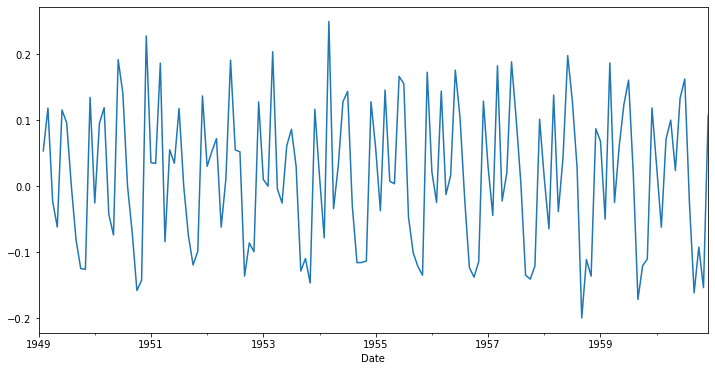

In [47]:
# Plot the result
df['percentage_change'].plot()

## Step 5 - Remove the seasonality

Demean each value by subtracting the monthly mean.

In [48]:
# Calculate the monthly mean percentage change of passenger numbers
df.groupby('month')['percentage_change'].mean()

month
January      0.025745
February    -0.010453
March        0.151735
April       -0.020056
May          0.008571
June         0.142526
July         0.121226
August       0.001147
September   -0.125067
October     -0.120018
November    -0.124927
December     0.132474
Name: percentage_change, dtype: float64

In [50]:
# Create a new column
df['monthly_mean'] = df.groupby('month')['percentage_change'].transform('mean')
df.head()

,year,month,passengers,difference,second_order_difference,timestep,timestep^2,percentage_change,monthly_mean
Date,,,,,,,,,
1949-01-01,1949,January,112,NaN,NaN,1,1,NaN,0.025745
1949-02-01,1949,February,118,6.0,NaN,2,4,0.053571,-0.010453
1949-03-01,1949,March,132,14.0,8.0,3,9,0.118644,0.151735
1949-04-01,1949,April,129,-3.0,-17.0,4,16,-0.022727,-0.020056
1949-05-01,1949,May,121,-8.0,-5.0,5,25,-0.062016,0.008571


In [51]:
# Demean the percentage change
df['deseasonalized'] = df['percentage_change'] - df['monthly_mean']
df.head()

,year,month,passengers,difference,second_order_difference,timestep,timestep^2,percentage_change,monthly_mean,deseasonalized
Date,,,,,,,,,,
1949-01-01,1949,January,112,NaN,NaN,1,1,NaN,0.025745,NaN
1949-02-01,1949,February,118,6.0,NaN,2,4,0.053571,-0.010453,0.064024
1949-03-01,1949,March,132,14.0,8.0,3,9,0.118644,0.151735,-0.033091
1949-04-01,1949,April,129,-3.0,-17.0,4,16,-0.022727,-0.020056,-0.002671
1949-05-01,1949,May,121,-8.0,-5.0,5,25,-0.062016,0.008571,-0.070587


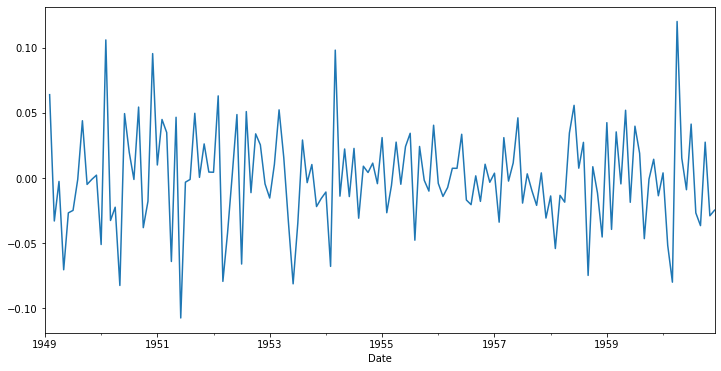

In [52]:
# Plot the result
df['deseasonalized'].plot()

## This is the time series we will actually do our analysis on!

1. We make predictions for the `df['deseasonalized']`
- We add back on the monthly_mean
- We take the last actual value and apply the percentage change to it

## Step 6 - Run a time series model on the remainder

## Step 7 - Reconstruct actual values from predictions

## Hint - statsmodels

In [4]:
# Import seasonal_decompose from statsmodels

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [58]:
# Additive decomposition
seasonal = seasonal_decompose(df['passengers'])

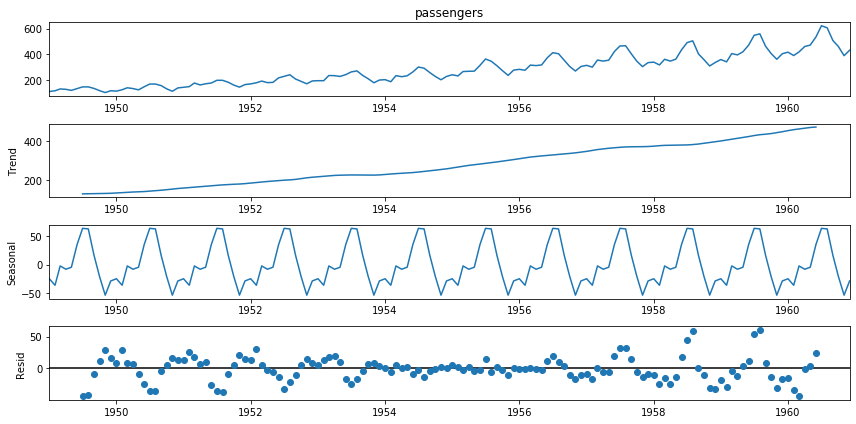

In [59]:
seasonal.plot()
plt.show()

In [60]:
# Multiplicative decomposition
seasonal_mult = seasonal_decompose(df['passengers'], model='multiplicative')

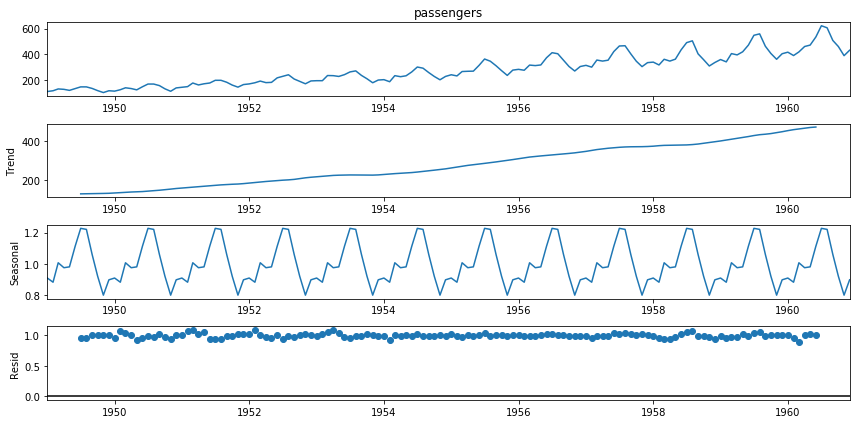

In [61]:
seasonal_mult.plot()
plt.show()

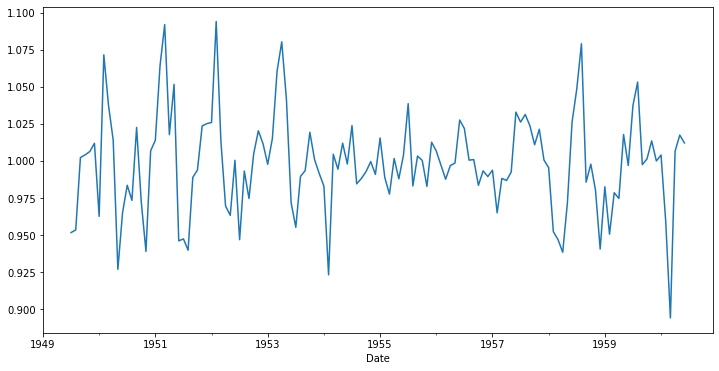

In [63]:
seasonal_mult.resid.plot()